In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [24]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [25]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [26]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [28]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [30]:
classifier = LogisticRegression(random_state=0)

In [31]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

In [38]:
X_set, y_set = X_train, y_train

In [72]:
np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1 , step = .01)

array([-2.60035469e+00, -2.59035469e+00, -2.58035469e+00, -2.57035469e+00,
       -2.56035469e+00, -2.55035469e+00, -2.54035469e+00, -2.53035469e+00,
       -2.52035469e+00, -2.51035469e+00, -2.50035469e+00, -2.49035469e+00,
       -2.48035469e+00, -2.47035469e+00, -2.46035469e+00, -2.45035469e+00,
       -2.44035469e+00, -2.43035469e+00, -2.42035469e+00, -2.41035469e+00,
       -2.40035469e+00, -2.39035469e+00, -2.38035469e+00, -2.37035469e+00,
       -2.36035469e+00, -2.35035469e+00, -2.34035469e+00, -2.33035469e+00,
       -2.32035469e+00, -2.31035469e+00, -2.30035469e+00, -2.29035469e+00,
       -2.28035469e+00, -2.27035469e+00, -2.26035469e+00, -2.25035469e+00,
       -2.24035469e+00, -2.23035469e+00, -2.22035469e+00, -2.21035469e+00,
       -2.20035469e+00, -2.19035469e+00, -2.18035469e+00, -2.17035469e+00,
       -2.16035469e+00, -2.15035469e+00, -2.14035469e+00, -2.13035469e+00,
       -2.12035469e+00, -2.11035469e+00, -2.10035469e+00, -2.09035469e+00,
       -2.08035469e+00, -

In [39]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1 , step = .01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = .01))

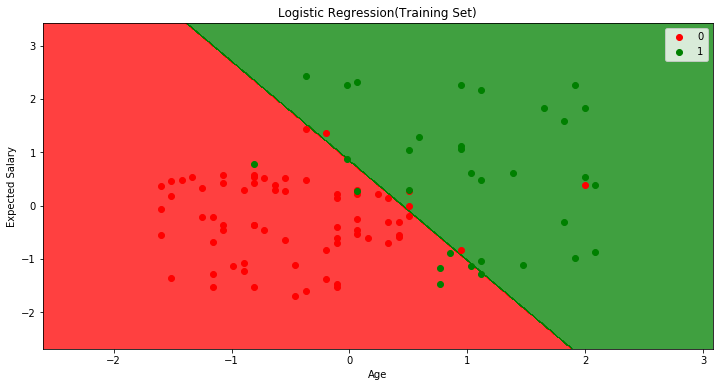

In [69]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set [y_set == j, 0], X_set [y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label =j)
plt.title("Logistic Regression(Training Set)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.legend()
plt.rcParams['figure.figsize'] = [15,6]
plt.show()

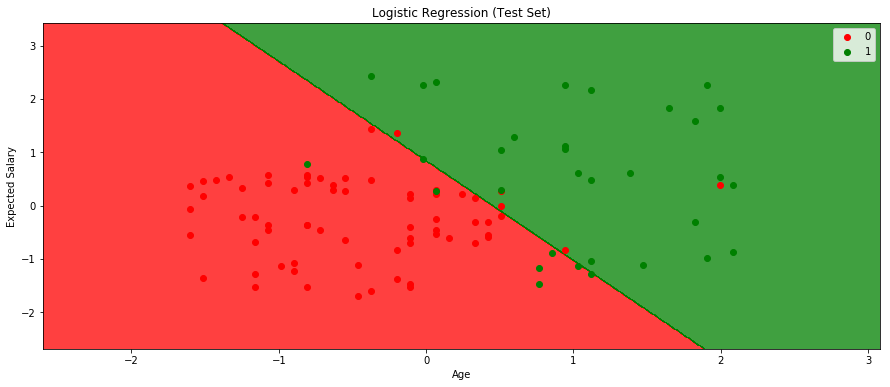

In [70]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1 , step = .01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set [y_set == j, 0], X_set [y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label =j)
plt.title("Logistic Regression (Test Set)")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.legend()
plt.rcParams['figure.figsize'] = [15,6]
plt.show()

In [71]:
X1

array([[-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       ...,
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531]])